In [1]:
import numpy as np
import sys
import pickle
import pathlib
import os

from os.path import join
path_to_file = str(pathlib.Path().resolve())
dir_path = join(path_to_file, "../../")


sys.path.append(join(dir_path, "HelperFiles"))
import helper
from train_models import *
from load_data import *
import top_k

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
# import shap
# import pandas as pd
# X_display, y_display = shap.datasets.adult(display=True)
# colnames = X_display.columns
# d = len(colnames)


In [2]:
import pandas as pd
data_dir = join(dir_path, "Experiments", "Data")
X_orig = pd.read_csv(join(data_dir, "census", "census_X.csv"), index_col=0)
colnames = X_orig.columns
colnames

Index(['Age', 'Workclass', 'Education-Num', 'Marital Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss',
       'Hours per week', 'Country'],
      dtype='object')

In [3]:
N_runs = 3
K = 5
dataset = "census"
X_train, y_train, X_test, y_test, mapping_dict = load_data(join(dir_path, "Experiments", "Data"), dataset)
d = len(mapping_dict)
model = train_model(X_train, y_train, model="nn", lime=False)
# 0 good; 2 oK
xloc = X_train[0]
N_samples_all_runs = []
shap_vals_all = []
for i in range(N_runs):
    rankshap_vals, diffs, N, converged = top_k.rankshap(model, X_train, xloc, mapping_dict=mapping_dict, 
                                                    K=K, alpha=0.2, n_equal=True, guarantee='rank', 
                                                    max_n_perms=5000, abs=True)
    # if converged:
    N_samples_all_runs.append([len(diffs_feat) for diffs_feat in diffs])
    shap_vals_all.append(rankshap_vals)

In [6]:
print(np.array(N_samples_all_runs).shape)
np.mean(shap_vals_all, axis=0).shape
N_samples_all_runs

(3, 12)


array([[ 100,  100,  100,  100, 5000,  100,  100,  100,  100,  100, 5000,
         100],
       [ 100,  100,  100,  100,  346,  100,  100,  100,  100,  100,  346,
         100],
       [ 100,  100,  100,  100, 5000,  100,  100, 5000,  100,  100, 5000,
         100]])

Text(0.5, 1.0, 'Average RankSHAP Samples per Feature, K=5')

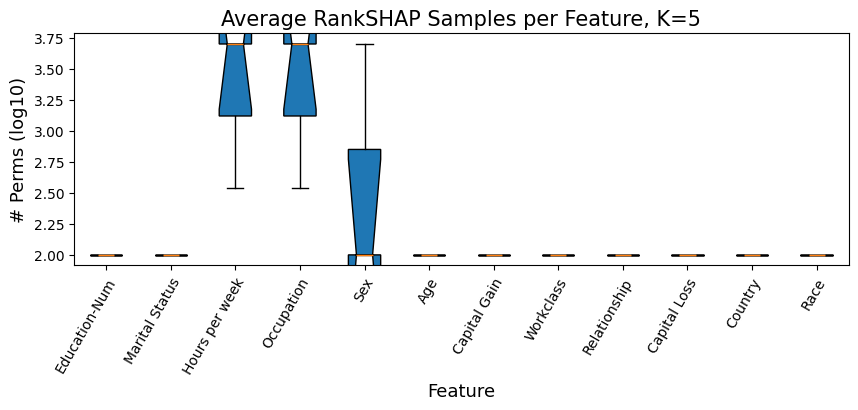

In [7]:
N_samples_all_runs = np.array(N_samples_all_runs)
meds = np.median(N_samples_all_runs, axis=0)
order = helper.get_ranking(rankshap_vals, abs=True)

plt.figure(figsize=(10,4))
c = "blue"
ordered_samples = np.log10(N_samples_all_runs[:,order])
# ordered_samples = N_samples_all_runs[:,order]
plt.boxplot(ordered_samples, showfliers=True, notch=True, patch_artist=True)

plt.xticks(np.arange(d)+1, colnames[order], rotation=60, rotation_mode='anchor', ha="right")
# plt.axhline(100, color="black", linestyle="dashed")
plt.subplots_adjust(bottom=0.3)
plt.xlabel("Feature", size=13)
plt.ylabel("# Perms (log10)", size=13)
plt.title("Average RankSHAP Samples per Feature, K=5", size=15)
# plt.savefig(join(dir_path, "Experiments", "Figures", "n_samples_rankshap.png"), bbox_inches="tight")
# plt.show()

Load n_samples (created in commented-out chunk)

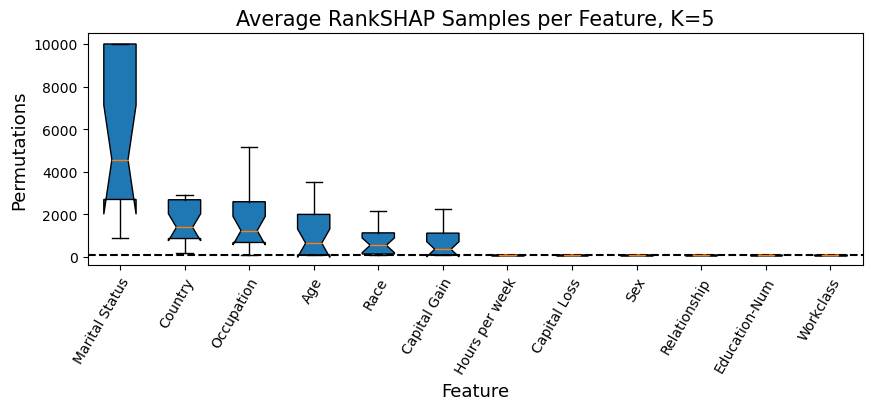

In [ ]:
# lengths = np.array(lengths)
# meds = np.median(lengths, axis=0)
# order = helper.get_ranking(meds)

# plt.figure(figsize=(10,4))
# c = "blue"
# plt.boxplot(lengths[:,order], showfliers=False, notch=True, patch_artist=True)

# plt.xticks(np.arange(d)+1, colnames[order], rotation=60, rotation_mode='anchor', ha="right")
# plt.axhline(100, color="black", linestyle="dashed")
# plt.subplots_adjust(bottom=0.3)
# plt.xlabel("Feature", size=13)
# plt.ylabel("Permutations", size=13)
# plt.title("Average RankSHAP Samples per Feature, K=5", size=15)
# # plt.savefig(join(dir_path, "Experiments", "Figures", "n_samples_rankshap.png"), bbox_inches="tight")
# # plt.show()